# Data exploration

- fullVisitorId- A unique identifier for each customer of the Gstore.
- channelGrouping - The channel via which the user came to the store.
- customDimensions - ???
- date - The date on which the user visited the Store.
- device - The specifications for the device used to access the Store.
- geoNetwork - This section contains information about the geography of the user.
- hits -  This section contains hits information.
- sessionId - A unique identifier for this visit to the store.
- socialEngagementType - Engagement type, either "Socially Engaged" or "Not Socially Engaged".
- totals - This section contains aggregate values across the session.
- trafficSource - This section contains information about the Traffic Source from which the session originated.
- visitId - An identifier for this session. This is part of the value usually stored as the _utmb cookie. This is only unique to the user. For a completely unique ID, you should use a combination of fullVisitorId and visitId.
- visitNumber - The session number for this user. If this is the first session, then this is set to 1.
- visitStartTime - The timestamp (expressed as POSIX time).


In [1]:
import pandas as pd
import numpy as np
import json
from ast import literal_eval
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
%matplotlib inline

## Import data

In [2]:
j_col = ['device', 'geoNetwork', 'totals', 'trafficSource']

In [3]:
train_df = pd.read_csv('train_v2.csv', converters={column: json.loads for column in j_col}, dtype={'fullVisitorId': 'str'}, nrows=100000)

In [4]:
train_df.head()

,channelGrouping,customDimensions,date,device,fullVisitorId,geoNetwork,hits,socialEngagementType,totals,trafficSource,visitId,visitNumber,visitStartTime
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,"{'browser': 'Firefox', 'browserVersion': 'not ...",3162355547410993243,"{'continent': 'Europe', 'subContinent': 'Weste...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'visits': '1', 'hits': '1', 'pageviews': '1',...","{'campaign': '(not set)', 'source': 'google', ...",1508198450,1,1508198450
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,"{'browser': 'Chrome', 'browserVersion': 'not a...",8934116514970143966,"{'continent': 'Americas', 'subContinent': 'Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,"{'visits': '1', 'hits': '2', 'pageviews': '2',...",{'referralPath': '/a/google.com/transportation...,1508176307,6,1508176307
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,"{'browser': 'Chrome', 'browserVersion': 'not a...",7992466427990357681,"{'continent': 'Americas', 'subContinent': 'Nor...","[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,"{'visits': '1', 'hits': '2', 'pageviews': '2',...","{'campaign': '(not set)', 'source': '(direct)'...",1508201613,1,1508201613
3,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,"{'browser': 'Chrome', 'browserVersion': 'not a...",9075655783635761930,"{'continent': 'Asia', 'subContinent': 'Western...","[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,"{'visits': '1', 'hits': '2', 'pageviews': '2',...","{'campaign': '(not set)', 'source': 'google', ...",1508169851,1,1508169851
4,Organic Search,"[{'index': '4', 'value': 'Central America'}]",20171016,"{'browser': 'Chrome', 'browserVersion': 'not a...",6960673291025684308,"{'continent': 'Americas', 'subContinent': 'Cen...","[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,"{'visits': '1', 'hits': '2', 'pageviews': '2',...","{'campaign': '(not set)', 'source': 'google', ...",1508190552,1,1508190552


In [5]:
train_df.shape

(100000, 13)

In [6]:
train_df.dtypes

channelGrouping         object
customDimensions        object
date                     int64
device                  object
fullVisitorId           object
geoNetwork              object
hits                    object
socialEngagementType    object
totals                  object
trafficSource           object
visitId                  int64
visitNumber              int64
visitStartTime           int64
dtype: object

### Data handling

#### Change POSIX timestamp to readable time.

In [7]:
from datetime import datetime

In [53]:
train_df['visitStartTime'] = train_df['visitStartTime'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S'))

In [55]:
train_df['visitStartTime'].head()

0    2017-10-17 00:00:50
1    2017-10-16 17:51:47
2    2017-10-17 00:53:33
3    2017-10-16 16:04:11
4    2017-10-16 21:49:12
Name: visitStartTime, dtype: object

#### Handling with hits chunk

In [10]:
hits_chunk = json_normalize(train_df['hits'].apply(lambda x: literal_eval(x)[0] if x != "[]" else literal_eval("{}")))

In [11]:
hits_chunk.head()

,appInfo.exitScreenName,appInfo.landingScreenName,appInfo.screenDepth,appInfo.screenName,contentGroup.contentGroup1,contentGroup.contentGroup2,contentGroup.contentGroup3,contentGroup.contentGroup4,contentGroup.contentGroup5,contentGroup.contentGroupUniqueViews1,...,promotionActionInfo.promoIsClick,promotionActionInfo.promoIsView,publisher_infos,referer,social.hasSocialSourceReferral,social.socialInteractionNetworkAction,social.socialNetwork,time,transaction.currencyCode,type
0,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/google+redesig...,0,shop.googlemerchandisestore.com/google+redesig...,(not set),Bags,(not set),(not set),(not set),NaN,...,NaN,NaN,[],https://www.google.co.uk/search?q=water+bottle...,No,:,(not set),0,USD,PAGE
1,shop.googlemerchandisestore.com/asearch.html,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,(not set),(not set),(not set),(not set),(not set),NaN,...,NaN,True,[],https://sites.google.com/a/google.com/transpor...,No,:,(not set),0,NaN,PAGE
2,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,(not set),(not set),(not set),(not set),(not set),NaN,...,NaN,True,[],https://www.googlemerchandisestore.com/,No,:,(not set),0,NaN,PAGE
3,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,(not set),(not set),(not set),(not set),(not set),NaN,...,NaN,True,[],https://www.google.com.tr/,No,:,(not set),0,NaN,PAGE
4,shop.googlemerchandisestore.com/google+redesig...,shop.googlemerchandisestore.com/home,0,shop.googlemerchandisestore.com/home,(not set),(not set),(not set),(not set),(not set),NaN,...,NaN,True,[],https://www.google.com.mx/,No,:,(not set),0,NaN,PAGE


In [12]:
hits_chunk.columns

Index(['appInfo.exitScreenName', 'appInfo.landingScreenName',
       'appInfo.screenDepth', 'appInfo.screenName',
       'contentGroup.contentGroup1', 'contentGroup.contentGroup2',
       'contentGroup.contentGroup3', 'contentGroup.contentGroup4',
       'contentGroup.contentGroup5', 'contentGroup.contentGroupUniqueViews1',
       'contentGroup.contentGroupUniqueViews2',
       'contentGroup.contentGroupUniqueViews3',
       'contentGroup.previousContentGroup1',
       'contentGroup.previousContentGroup2',
       'contentGroup.previousContentGroup3',
       'contentGroup.previousContentGroup4',
       'contentGroup.previousContentGroup5', 'customDimensions',
       'customMetrics', 'customVariables', 'dataSource',
       'eCommerceAction.action_type', 'eCommerceAction.option',
       'eCommerceAction.step', 'eventInfo.eventAction',
       'eventInfo.eventCategory', 'eventInfo.eventLabel',
       'exceptionInfo.isFatal', 'experiment', 'hitNumber', 'hour',
       'isEntrance', 'isExit', 

In [56]:
hcc = hits_chunk.columns.to_list()
for i in hcc:
    print(i + ':')
    print(hits_chunk[i].value_counts(dropna=False))
    print('\n')
    print('\n')

appInfo.exitScreenName:
www.googlemerchandisestore.com/home                                                                                                21036
shop.googlemerchandisestore.com/home                                                                                               19245
shop.googlemerchandisestore.com/google+redesign/shop+by+brand/youtube                                                              13309
shop.googlemerchandisestore.com/basket.html                                                                                         2502
shop.googlemerchandisestore.com/signin.html                                                                                         2436
shop.googlemerchandisestore.com/asearch.html                                                                                        2283
shop.googlemerchandisestore.com/google+redesign/apparel/mens/mens+t+shirts                                                          1790
shop.googlemercha

(not set)    99592
Google         373
YouTube         22
NaN             13
Name: contentGroup.contentGroup1, dtype: int64




contentGroup.contentGroup2:
(not set)      64528
Brands         18433
Apparel         9205
Bags            1876
Accessories     1623
Drinkware       1360
Electronics     1286
Office          1027
Nest             613
Lifestyle         36
NaN               13
Name: contentGroup.contentGroup2, dtype: int64




contentGroup.contentGroup3:
(not set)    97926
Mens          1731
Womens         330
NaN             13
Name: contentGroup.contentGroup3, dtype: int64




contentGroup.contentGroup4:
(not set)    99987
NaN             13
Name: contentGroup.contentGroup4, dtype: int64




contentGroup.contentGroup5:
(not set)    99987
NaN             13
Name: contentGroup.contentGroup5, dtype: int64




contentGroup.contentGroupUniqueViews1:
NaN    99606
1        394
Name: contentGroup.contentGroupUniqueViews1, dtype: int64




contentGroup.contentGroupUniqueViews2:
NaN    6

shop.googlemerchandisestore.com    69445
www.googlemerchandisestore.com     30542
NaN                                   13
Name: page.hostname, dtype: int64




page.pagePath:
/home                                                                                                      59682
/google+redesign/shop+by+brand/youtube                                                                     17305
/google+redesign/apparel/mens/mens+t+shirts                                                                 2271
/signin.html                                                                                                1738
/google+redesign/apparel/men++s/men++s+t+shirts                                                             1250
/google+redesign/apparel                                                                                    1131
/google+redesign/bags                                                                                       1053
/google+redesign/drinkware       

                                               63514
/shop+by+brand/                                18340
/apparel/                                       8025
/apparel                                        1180
/bags                                           1053
/accessories/                                   1040
/drinkware                                       974
/bags/                                           823
/electronics/                                    799
/office/                                         676
/nest/                                           611
/accessories                                     556
/electronics                                     487
/drinkware/                                      386
/office                                          349
/lifestyle/                                      281
/frequently-asked-questions/                     174
/gift+cards                                      120
/shop+by+brand                                

[]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

0      99987
NaN       13
Name: time, dtype: int64




transaction.currencyCode:
NaN    74560
USD    25440
Name: transaction.currencyCode, dtype: int64




type:
PAGE     99757
EVENT      230
NaN         13
Name: type, dtype: int64






#### Handling with json columns.

In [17]:
for column in j_col:
    column_as_df = json_normalize(train_df[column])
    column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
    train_df = train_df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

In [18]:
column_as_df = json_normalize(train_df['customDimensions'].apply(lambda x: literal_eval(x)[0] if x != "[]" else {'index': 'NaN', 'value': 'NaN'}))
column_as_df.columns = [f"{'customDimensions'}_{subcolumn}" for subcolumn in column_as_df.columns]
train_df = train_df.drop('customDimensions', axis=1).merge(column_as_df, right_index=True, left_index=True)

In [19]:
train_df.shape

(100000, 60)

In [54]:
train_df.head()

,channelGrouping,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,...,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source,customDimensions_index,customDimensions_value
0,Organic Search,20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,2017-10-17 00:00:50,Firefox,not available in demo dataset,...,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google,4,EMEA
1,Referral,20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,2017-10-16 17:51:47,Chrome,not available in demo dataset,...,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com,4,North America
2,Direct,20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,2017-10-17 00:53:33,Chrome,not available in demo dataset,...,NaN,NaN,(not set),True,NaN,(none),NaN,(direct),4,North America
3,Organic Search,20171016,9075655783635761930,"[{'hitNumber': '1', 'time': '0', 'hour': '9', ...",Not Socially Engaged,1508169851,1,2017-10-16 16:04:11,Chrome,not available in demo dataset,...,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,4,EMEA
4,Organic Search,20171016,6960673291025684308,"[{'hitNumber': '1', 'time': '0', 'hour': '14',...",Not Socially Engaged,1508190552,1,2017-10-16 21:49:12,Chrome,not available in demo dataset,...,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google,4,Central America


#### Value to predict

In [47]:
train_df.totals_transactionRevenue.fillna(0,inplace=True)

In [48]:
train_df.totals_transactionRevenue.value_counts()

0            99003
17590000        22
33590000        22
13590000        17
18990000        15
16990000        14
21990000        14
55990000        11
19990000        10
59990000        10
44790000         8
15190000         8
47990000         8
35180000         7
15990000         7
79990000         7
24990000         6
10390000         6
19190000         5
12990000         5
67180000         5
13290000         5
28780000         5
100000000        5
8790000          4
119990000        4
23990000         4
51990000         4
27180000         4
8990000          4
             ...  
30460000         1
26400000         1
134750000        1
127980000        1
37960000         1
139500000        1
31950000         1
90460000         1
80260000         1
728200000        1
147100000        1
23490000         1
279500000        1
137340000        1
116780000        1
76020000         1
103360000        1
263700000        1
200660000        1
74430000         1
37970000         1
86380000    

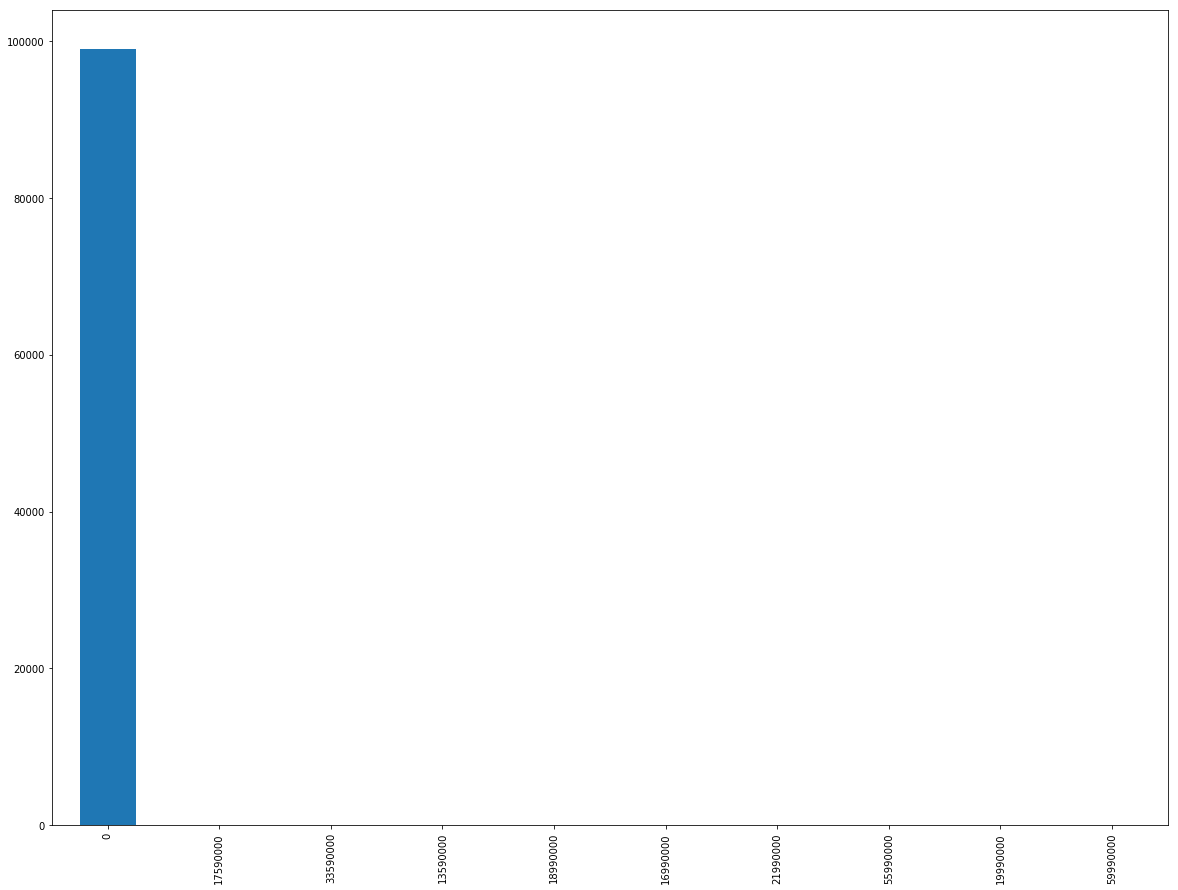

In [50]:
train_df.totals_transactionRevenue.value_counts(dropna=False)[:10].plot.bar(figsize=(20,15))

#### Other values

In [32]:
cols = train_df.columns.to_list()
cols

['channelGrouping',
 'date',
 'fullVisitorId',
 'hits',
 'socialEngagementType',
 'visitId',
 'visitNumber',
 'visitStartTime',
 'device_browser',
 'device_browserSize',
 'device_browserVersion',
 'device_deviceCategory',
 'device_flashVersion',
 'device_isMobile',
 'device_language',
 'device_mobileDeviceBranding',
 'device_mobileDeviceInfo',
 'device_mobileDeviceMarketingName',
 'device_mobileDeviceModel',
 'device_mobileInputSelector',
 'device_operatingSystem',
 'device_operatingSystemVersion',
 'device_screenColors',
 'device_screenResolution',
 'geoNetwork_city',
 'geoNetwork_cityId',
 'geoNetwork_continent',
 'geoNetwork_country',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'geoNetwork_metro',
 'geoNetwork_networkDomain',
 'geoNetwork_networkLocation',
 'geoNetwork_region',
 'geoNetwork_subContinent',
 'totals_bounces',
 'totals_hits',
 'totals_newVisits',
 'totals_pageviews',
 'totals_sessionQualityDim',
 'totals_timeOnSite',
 'totals_totalTransactionRevenue',
 'totals_tr

In [57]:
train_df.channelGrouping.value_counts()

Organic Search    43254
Social            21641
Direct            14967
Referral          12516
Display            2934
Paid Search        2793
Affiliates         1891
(Other)               4
Name: channelGrouping, dtype: int64

In [58]:
train_df.socialEngagementType.value_counts()

Not Socially Engaged    100000
Name: socialEngagementType, dtype: int64

In [59]:
train_df['customDimensions_index'].value_counts()

4      79786
NaN    20214
Name:  customDimensions_index, dtype: int64

In [60]:
train_df['customDimensions_value'].value_counts()

North America      43785
NaN                20214
EMEA               18371
APAC               13306
South America       2743
Central America     1581
Name:  customDimensions_value, dtype: int64

##### device

In [34]:
device = [i for i in cols if i.startswith('device')]
device

['device_browser',
 'device_browserSize',
 'device_browserVersion',
 'device_deviceCategory',
 'device_flashVersion',
 'device_isMobile',
 'device_language',
 'device_mobileDeviceBranding',
 'device_mobileDeviceInfo',
 'device_mobileDeviceMarketingName',
 'device_mobileDeviceModel',
 'device_mobileInputSelector',
 'device_operatingSystem',
 'device_operatingSystemVersion',
 'device_screenColors',
 'device_screenResolution']

In [52]:
for dev in device:
    print(dev + ':')
    print(train_df[dev].value_counts(dropna=False))
    print('\n')
    print('\n')

device_browser:
Chrome                      68272
Safari                      18609
Firefox                      3641
Android Webview              2357
Internet Explorer            2070
Edge                         1176
Samsung Internet              914
Opera Mini                    884
Safari (in-app)               744
Opera                         521
UC Browser                    328
YaBrowser                     153
Amazon Silk                    97
Coc Coc                        66
Android Browser                49
Mozilla Compatible Agent       32
BlackBerry                     17
Nintendo Browser               15
MRCHROME                       12
Puffin                         11
Maxthon                         9
Nokia Browser                   8
Browser                         2
DESKTOP                         2
Seznam                          1
(not set)                       1
LYF_LS_4002_12                  1
ThumbSniper                     1
osee2unifiedRelease             

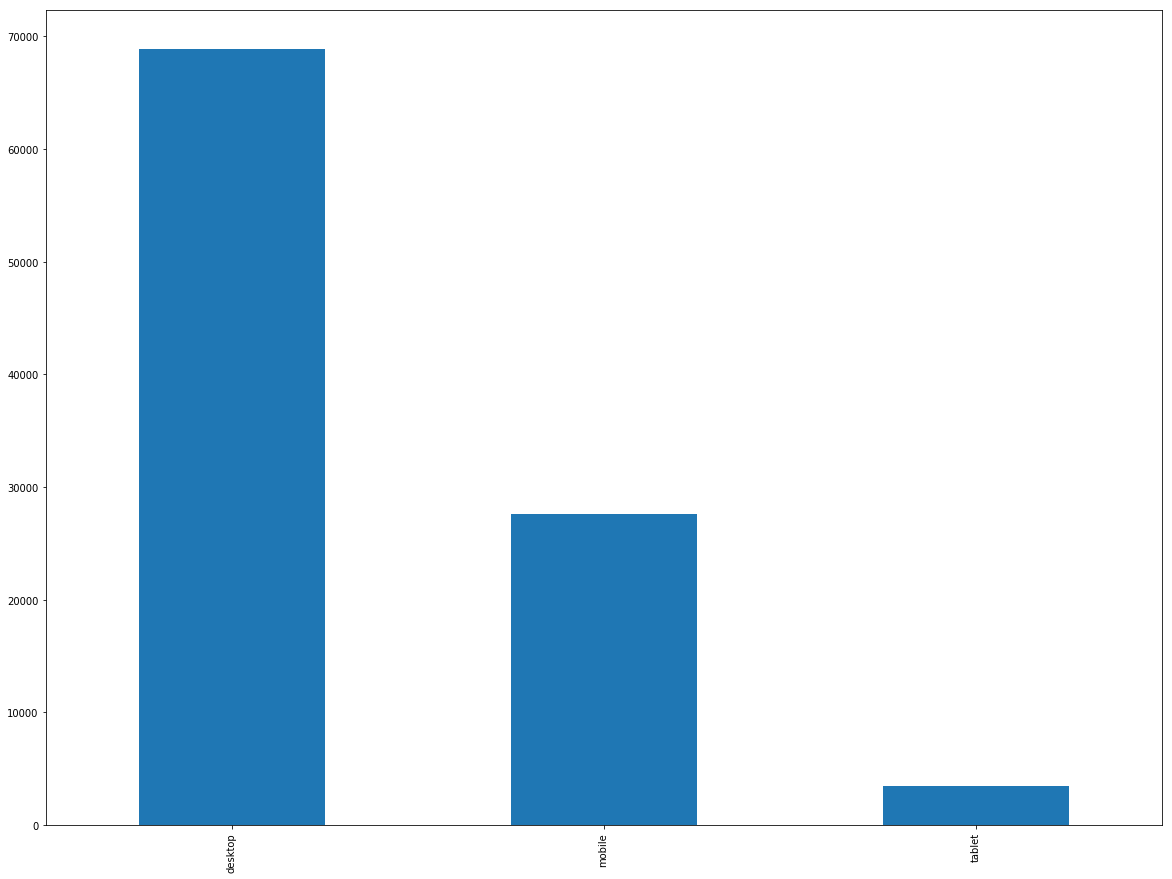

In [24]:
train_df.device_deviceCategory.value_counts(dropna=False).plot.bar(figsize=(20,15))

##### geoNetwork

In [35]:
geoNetwork = [i for i in cols if i.startswith('geoNetwork')]
geoNetwork

['geoNetwork_city',
 'geoNetwork_cityId',
 'geoNetwork_continent',
 'geoNetwork_country',
 'geoNetwork_latitude',
 'geoNetwork_longitude',
 'geoNetwork_metro',
 'geoNetwork_networkDomain',
 'geoNetwork_networkLocation',
 'geoNetwork_region',
 'geoNetwork_subContinent']

In [50]:
for gnw in geoNetwork:
    print(gnw + ':')
    print(train_df[gnw].value_counts(dropna=False))
    print('\n')
    print('\n')

geoNetwork_city:
not available in demo dataset    54332
Mountain View                     4460
(not set)                         3863
New York                          2753
San Francisco                     2270
Sunnyvale                         1603
London                            1343
San Jose                          1189
Los Angeles                        942
Chicago                            840
Bangkok                            758
Ho Chi Minh City                   675
Bengaluru                          626
Toronto                            584
Seattle                            584
Istanbul                           575
Hyderabad                          542
Mumbai                             532
Sydney                             526
Hanoi                              520
Chennai                            516
Dublin                             491
Sao Paulo                          482
Paris                              455
Singapore                          447
Jakarta 

not available in demo dataset    54332
California                       12296
(not set)                         2908
New York                          2759
England                           1521
Texas                             1108
Illinois                           886
Washington                         873
Maharashtra                        809
Bangkok                            758
Delhi                              696
Ontario                            648
Taipei City                        645
Karnataka                          626
Tamil Nadu                         588
Istanbul                           575
Telangana                          549
Hanoi                              535
Ho Chi Minh                        532
New South Wales                    526
State of Sao Paulo                 488
Ile-de-France                      455
County Dublin                      440
Jakarta                            424
Tokyo                              373
Mexico City              

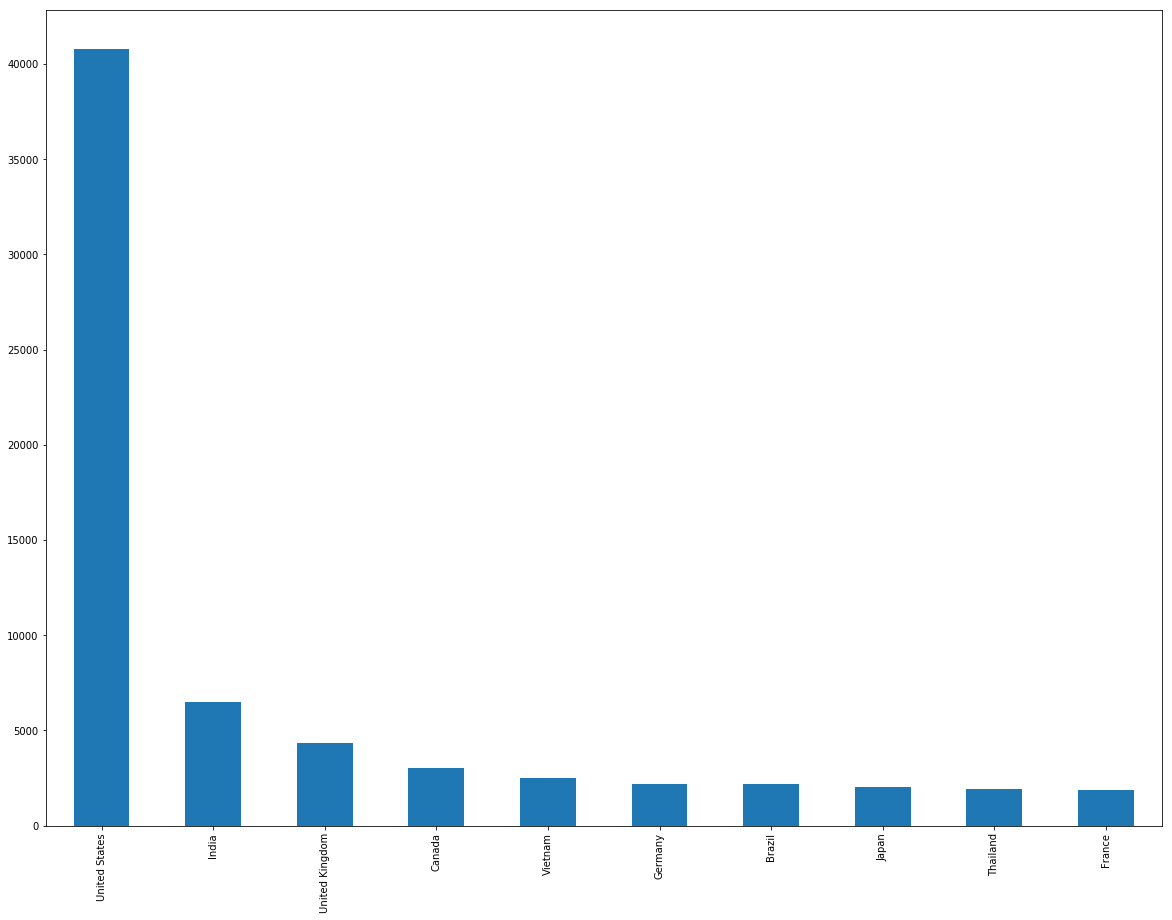

In [10]:
train_df.geoNetwork_country.value_counts(dropna=False)[:10].plot.bar(figsize=(20,15))

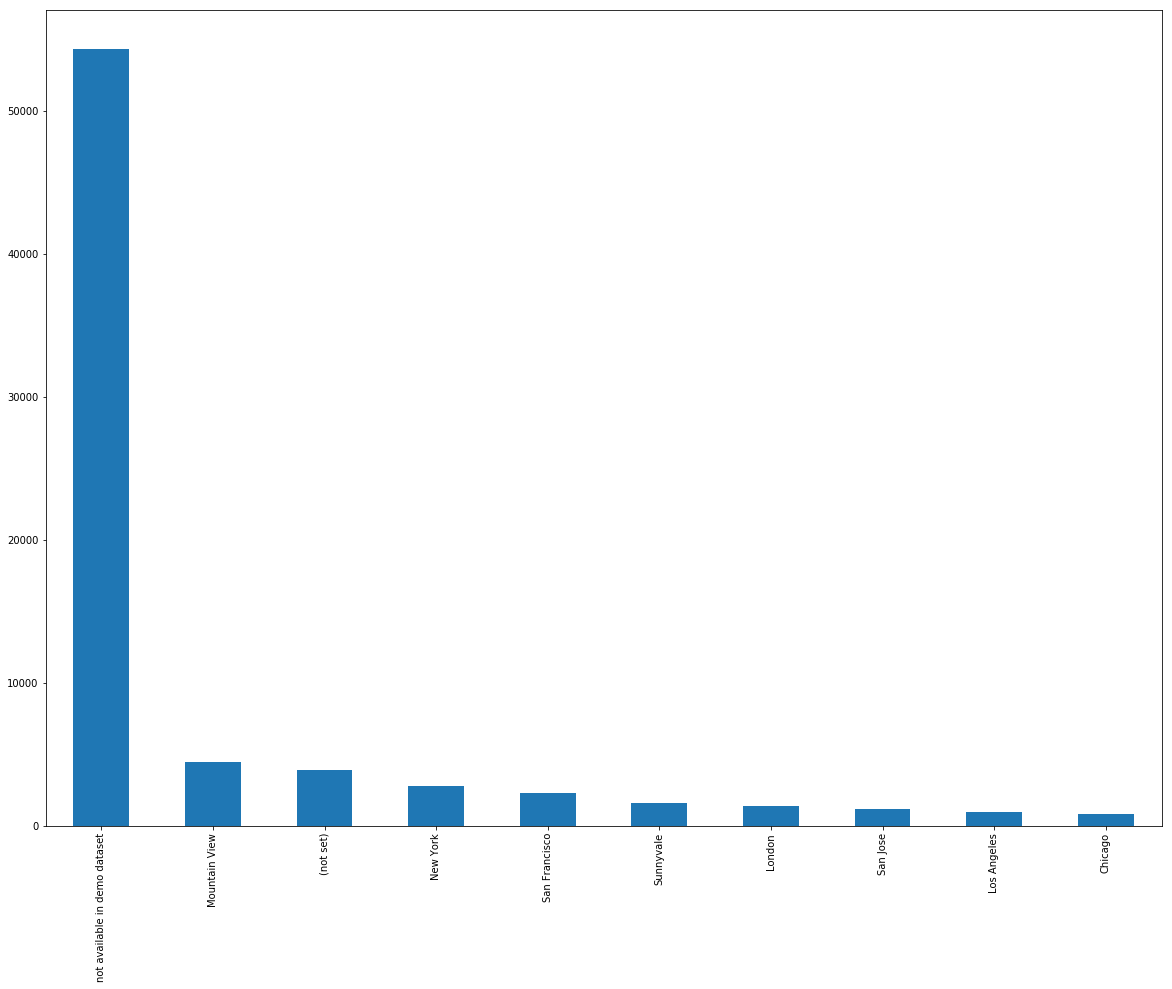

In [9]:
train_df.geoNetwork_city.value_counts(dropna=False)[:10].plot.bar(figsize=(20,15))

In [26]:
train_df.geoNetwork_networkDomain.value_counts(dropna=False)

(not set)                 28537
unknown.unknown           16289
comcast.net                3160
rr.com                     1622
verizon.net                1461
ttnet.com.tr               1081
comcastbusiness.net         957
hinet.net                   909
virginm.net                 744
cox.net                     619
prod-infinitum.com.mx       610
google.com                  591
sbcglobal.net               591
att.net                     576
btcentralplus.com           568
optonline.net               541
vnpt.vn                     522
3bb.co.th                   512
totbb.net                   446
qwest.net                   444
rima-tde.net                435
asianet.co.th               433
telecomitalia.it            376
airtelbroadband.in          365
tedata.net                  356
pldt.net                    340
virtua.com.br               335
bell.ca                     334
t-ipconnect.de              329
bhn.net                     308
                          ...  
rostagro

##### totals

In [37]:
totals = [i for i in cols if i.startswith('totals')]
totals

['totals_bounces',
 'totals_hits',
 'totals_newVisits',
 'totals_pageviews',
 'totals_sessionQualityDim',
 'totals_timeOnSite',
 'totals_totalTransactionRevenue',
 'totals_transactionRevenue',
 'totals_transactions',
 'totals_visits']

In [51]:
for total in totals:
    print(total + ':')
    print(train_df[total].value_counts(dropna=False))
    print('\n')
    print('\n')

totals_bounces:
NaN    50146
1      49854
Name: totals_bounces, dtype: int64




totals_hits:
1      49441
2      14605
3       8061
4       4907
5       3888
6       2831
7       2258
8       1798
9       1419
10      1227
11      1015
12       887
13       736
14       668
15       577
16       508
17       454
18       408
19       345
20       317
21       273
22       244
25       213
23       207
24       203
26       164
27       154
28       144
30       135
29       120
       ...  
148        1
187        1
155        1
331        1
224        1
136        1
303        1
179        1
183        1
189        1
241        1
215        1
137        1
156        1
227        1
110        1
126        1
98         1
298        1
145        1
147        1
134        1
146        1
120        1
143        1
165        1
229        1
154        1
149        1
111        1
Name: totals_hits, Length: 151, dtype: int64




totals_newVisits:
1      76365
NaN    23635
Name: totals_newVisi

##### trafficSource

In [36]:
trafficSource = [i for i in cols if i.startswith('trafficSource')]
trafficSource

['trafficSource_adContent',
 'trafficSource_adwordsClickInfo.adNetworkType',
 'trafficSource_adwordsClickInfo.criteriaParameters',
 'trafficSource_adwordsClickInfo.gclId',
 'trafficSource_adwordsClickInfo.isVideoAd',
 'trafficSource_adwordsClickInfo.page',
 'trafficSource_adwordsClickInfo.slot',
 'trafficSource_campaign',
 'trafficSource_isTrueDirect',
 'trafficSource_keyword',
 'trafficSource_medium',
 'trafficSource_referralPath',
 'trafficSource_source']

In [47]:
for ts in trafficSource:
    print(ts + ':')
    print(train_df[ts].value_counts(dropna=False))
    print('\n')
    print('\n')

trafficSource_adContent:
NaN                                   96237
Google Merchandise Store               2276
Google Merchandise Collection           490
Placement Accessores 300 x 250          176
Display Ad created 3/11/14              118
Google Online Store                      96
Smart display ad - 8/17/2017             81
Full auto ad IMAGE ONLY                  52
Ad from 12/15/17                         51
Placement Drinkware 300x250              48
Official Google Merchandise              47
Ad from 12/13/16                         42
Display Ad created 3/11/15               33
Placement Accessories 336 x 280          25
{KeyWord:Google Merchandise}             23
Placement Accessories 160 x 600          17
{KeyWord:Google Brand Items}             15
Display Ad created 11/17/14              14
BQ                                       13
Placement Accessories 300 x 250          10
Ad from 11/3/16                           9
Swag with Google Logos                    9
{KeyWor

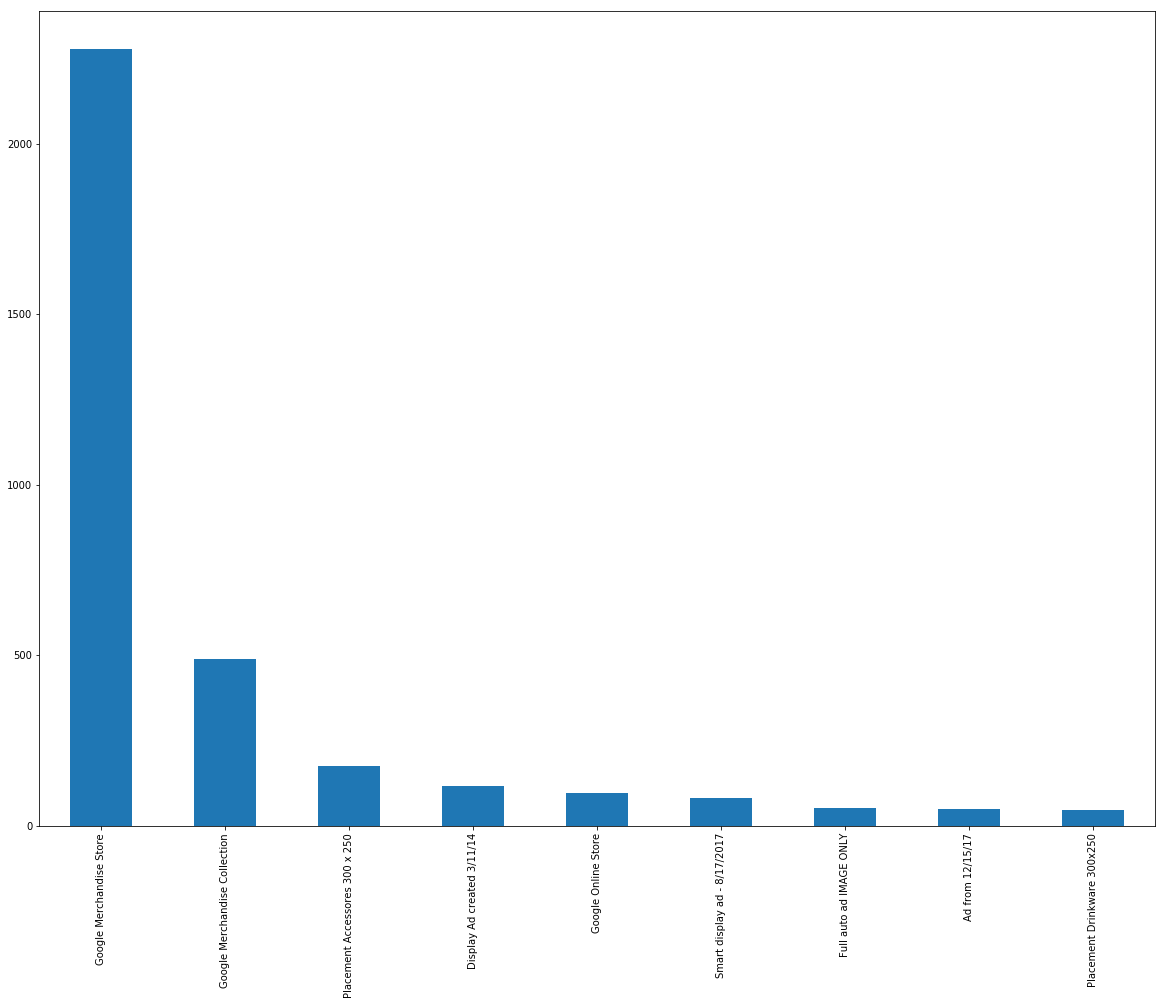

In [11]:
train_df.trafficSource_adContent.value_counts(dropna=False)[1:10].plot.bar(figsize=(20,15))